In [ ]:
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [ ]:
library(e1071)

data <- read.table("/content/2020_bn_nb_data.txt", header=TRUE, sep="\t")

data[] <- lapply(data, as.factor)


set.seed(123)
trainIndex <- sample(1:nrow(data), 0.7 * nrow(data))
trainData <- data[trainIndex, ]
testData <- data[-trainIndex, ]

model <- naiveBayes(QP ~ ., data = trainData)

predictions <- predict(model, testData)

table(predictions, testData$QP)
accuracy <- sum(predictions == testData$QP) / nrow(testData)
print(paste("Accuracy:", accuracy))


           
predictions  n  y
          n 20  1
          y  1 48

[1] "Accuracy: 0.971428571428571"


In [ ]:
install.packages("bnlearn")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




  Bayesian network parameters

  Parameters of node EC100 (multinomial distribution)

Conditional probability table:
         AA         AB         BB         BC         CC         CD         DD 
0.03017241 0.09482759 0.15086207 0.20689655 0.15517241 0.12500000 0.08620690 
         F 
0.15086207 

  Parameters of node EC160 (multinomial distribution)

Conditional probability table:
 
     QP
EC160          n          y
   AA 0.00000000 0.07500000
   AB 0.00000000 0.10000000
   BB 0.01388889 0.18750000
   BC 0.01388889 0.36250000
   CC 0.15277778 0.22500000
   CD 0.44444444 0.03125000
   DD 0.26388889 0.01875000
   F  0.11111111 0.00000000

  Parameters of node IT101 (multinomial distribution)

Conditional probability table:
 
     QP
IT101          n          y
   AA 0.00000000 0.07500000
   AB 0.00000000 0.15625000
   BB 0.04166667 0.19375000
   BC 0.02777778 0.29375000
   CC 0.13888889 0.20000000
   CD 0.30555556 0.08125000
   DD 0.31944444 0.00000000
   F  0.16666667 0.00000000

  

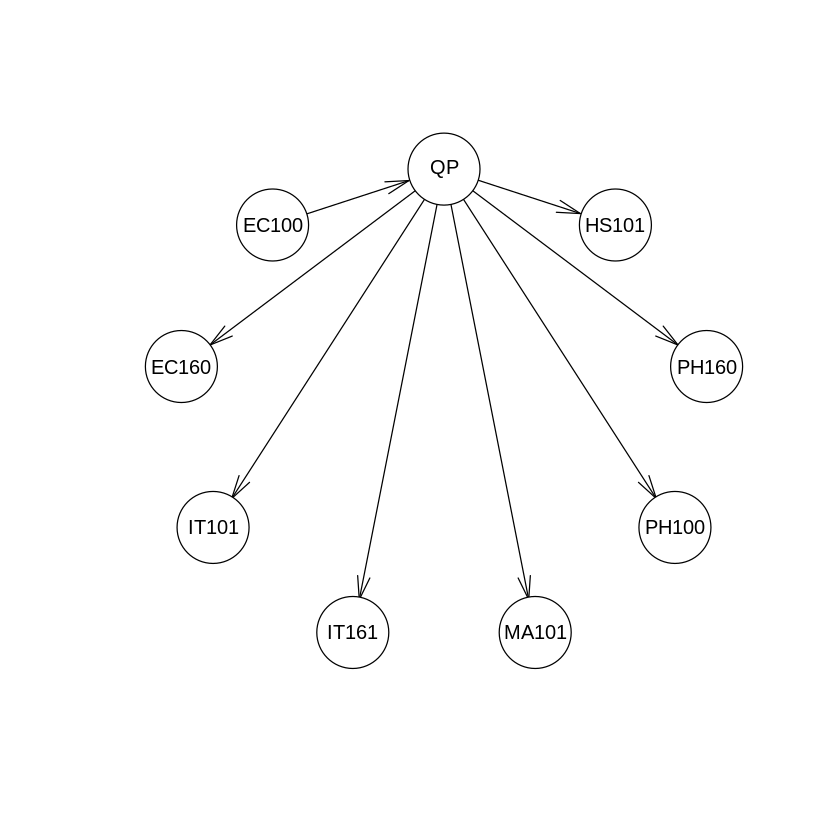

In [ ]:
library(bnlearn)

data <- read.table("/content/2020_bn_nb_data.txt", header = TRUE, sep = "\t")


data[] <- lapply(data, as.factor)

bn <- hc(data)

plot(bn)

fitted_bn <- bn.fit(bn, data)

print(fitted_bn)
